In [1]:
!pip install pyspark

In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("city_day.csv")
df.head(5)

,City,Date,PM2,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


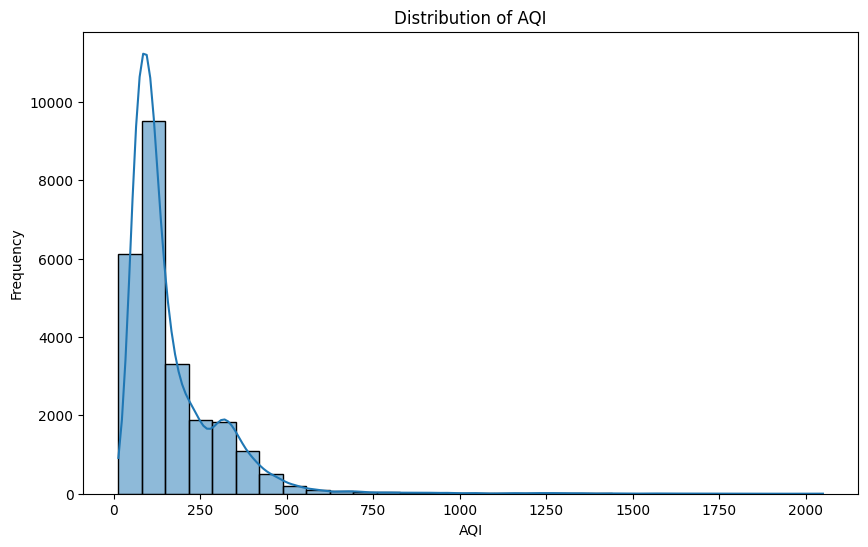

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], bins=30, kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         29531 non-null  object 
 1   Date         29531 non-null  object 
 2   PM2          24933 non-null  float64
 3   PM10         18391 non-null  float64
 4   NO           25949 non-null  float64
 5   NO2          25946 non-null  float64
 6   NOx          25346 non-null  float64
 7   NH3          19203 non-null  float64
 8   CO           27472 non-null  float64
 9   SO2          25677 non-null  float64
 10  O3           25509 non-null  float64
 11  Benzene      23908 non-null  float64
 12  Toluene      21490 non-null  float64
 13  Xylene       11422 non-null  float64
 14  AQI          24850 non-null  float64
 15  Air_quality  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (29531, 16)


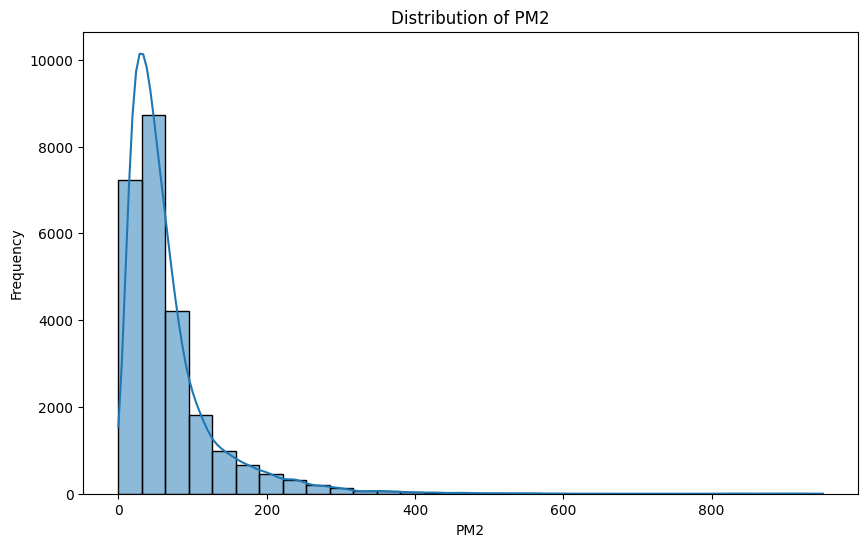

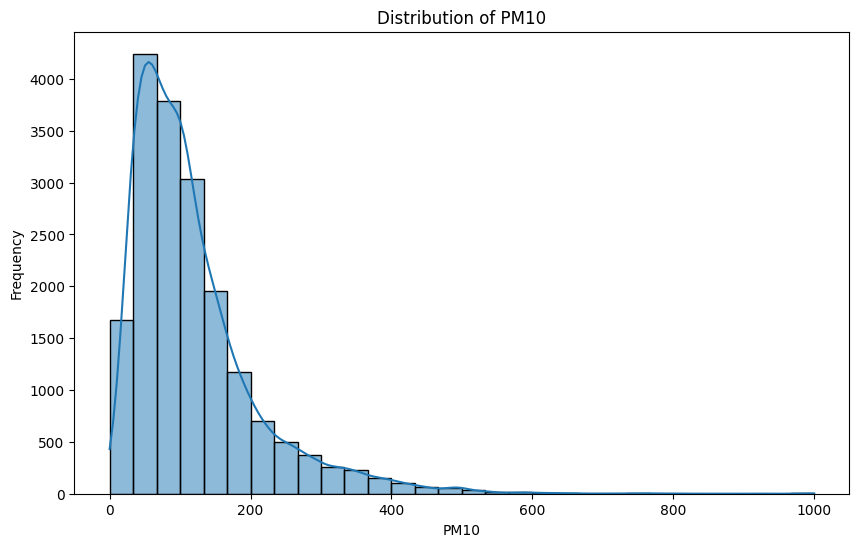

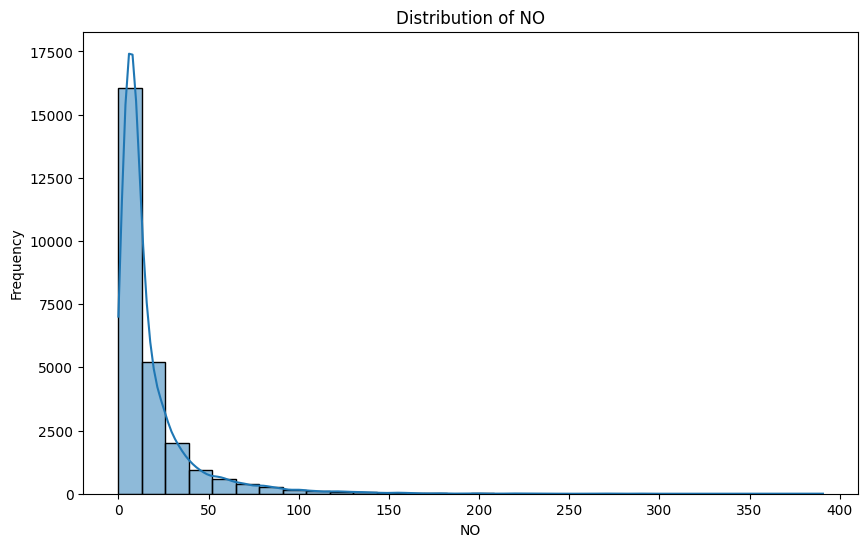

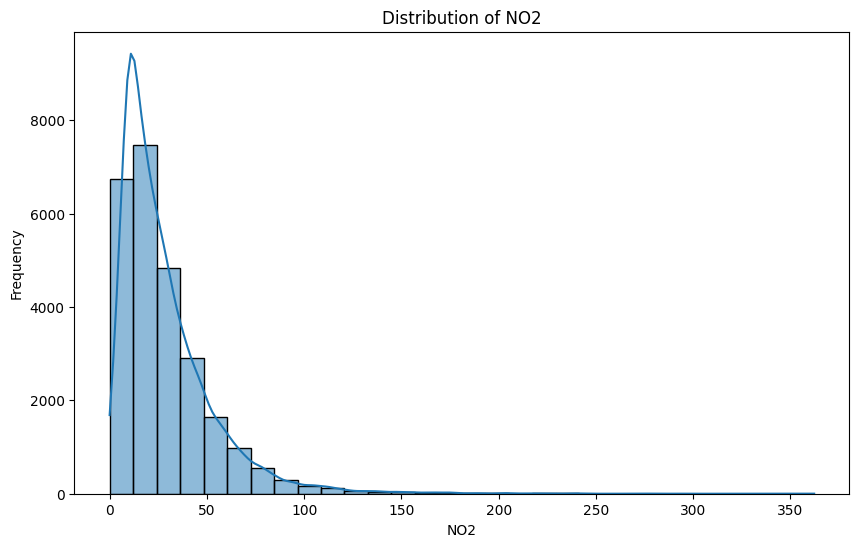

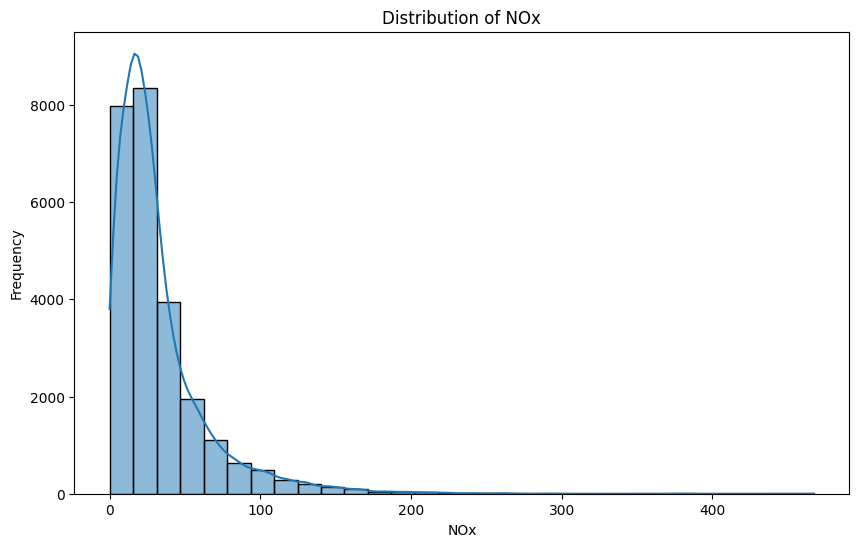

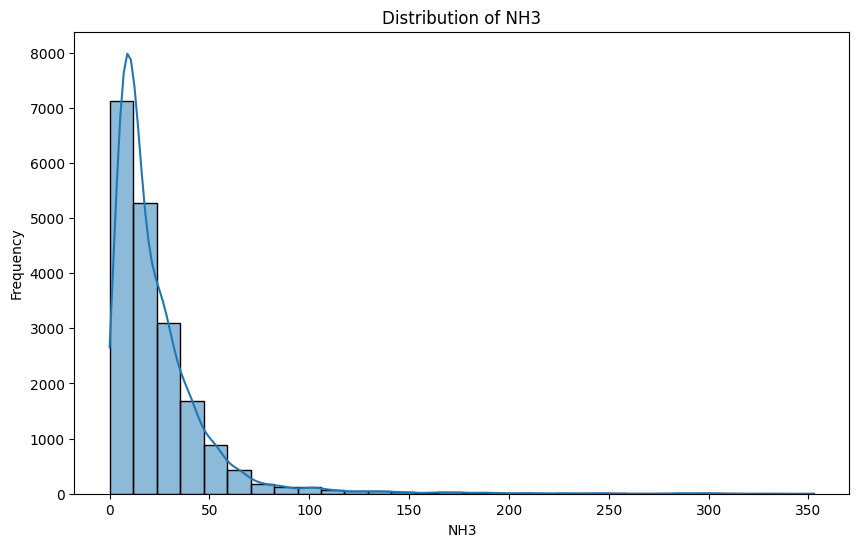

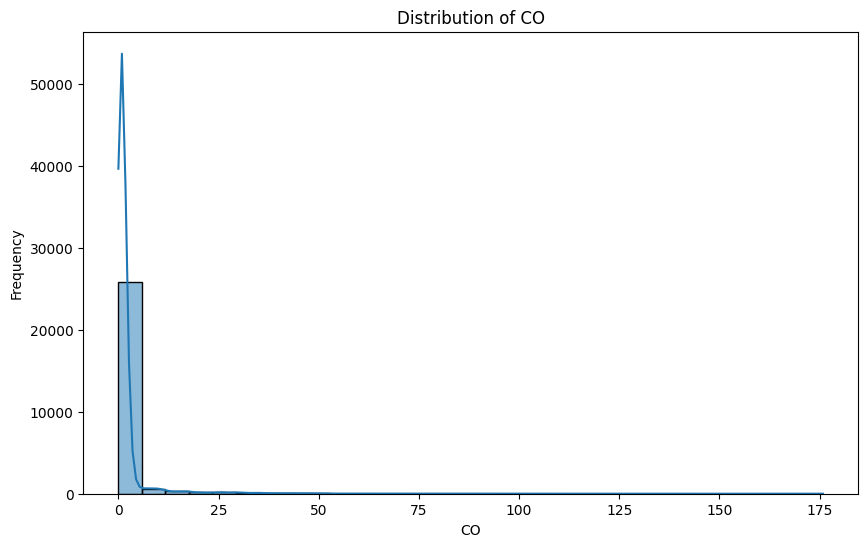

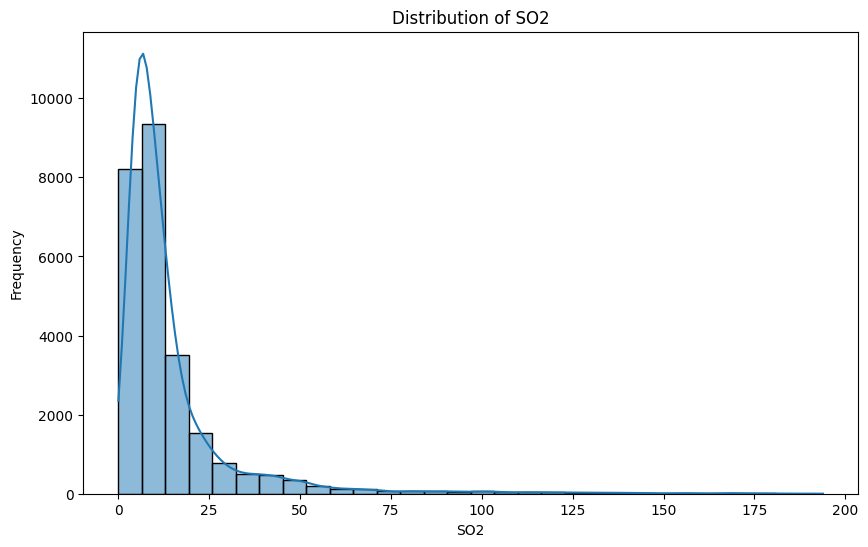

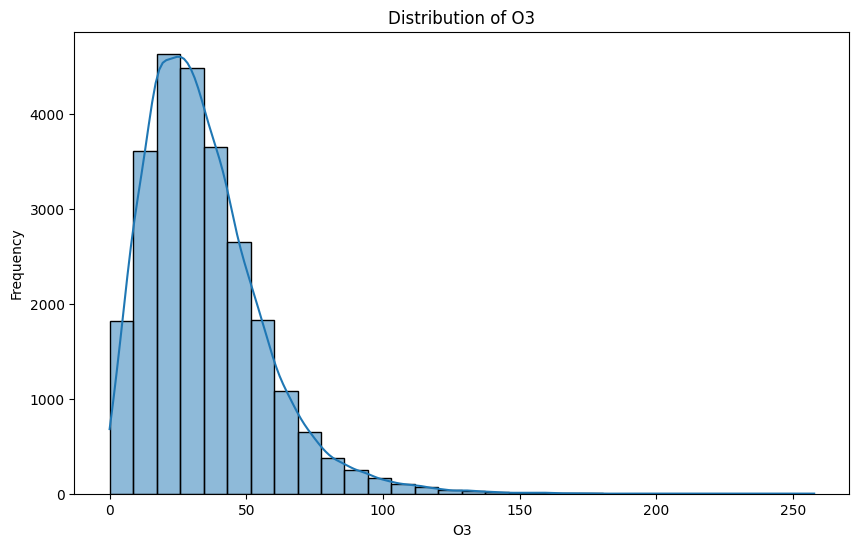

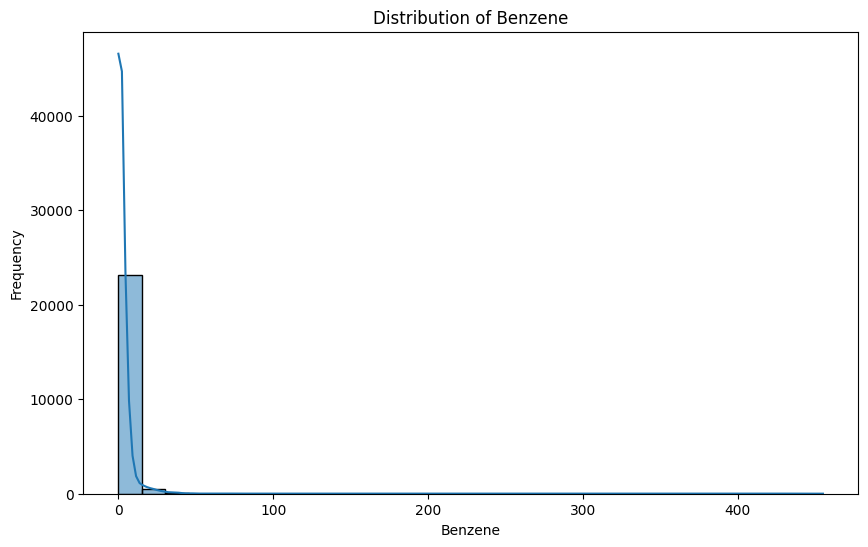

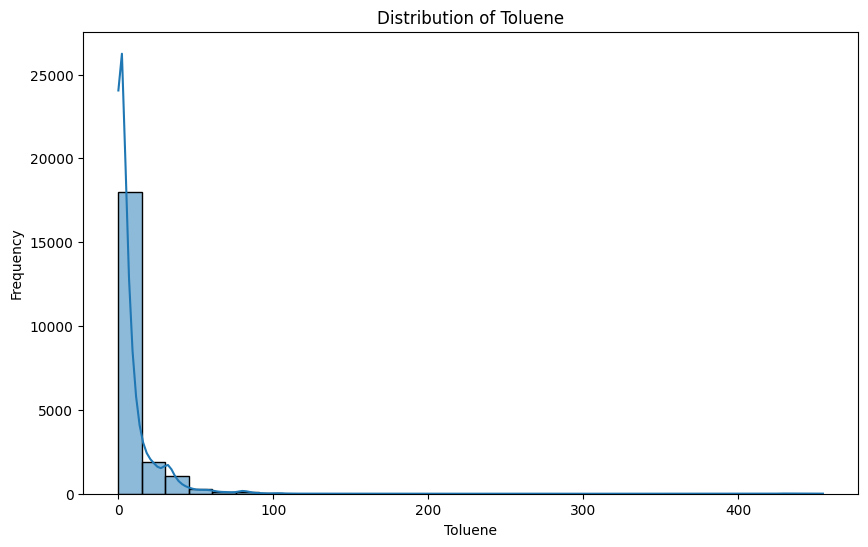

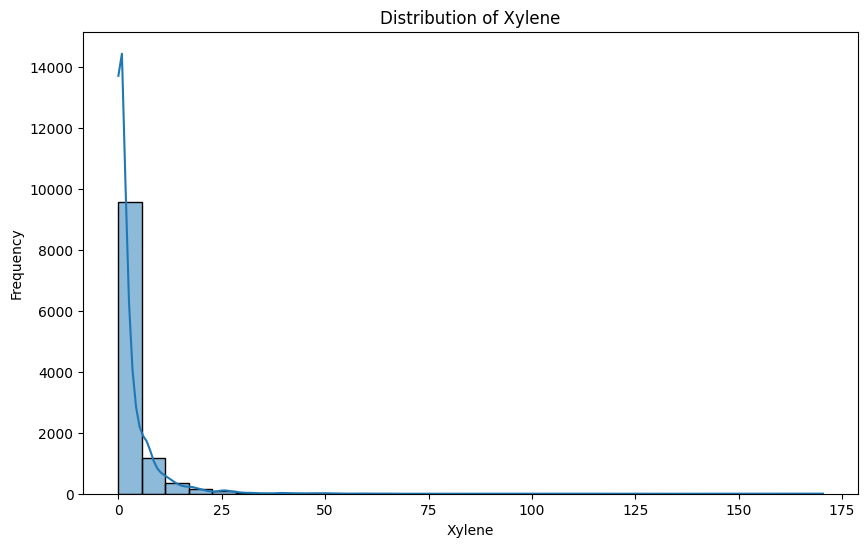

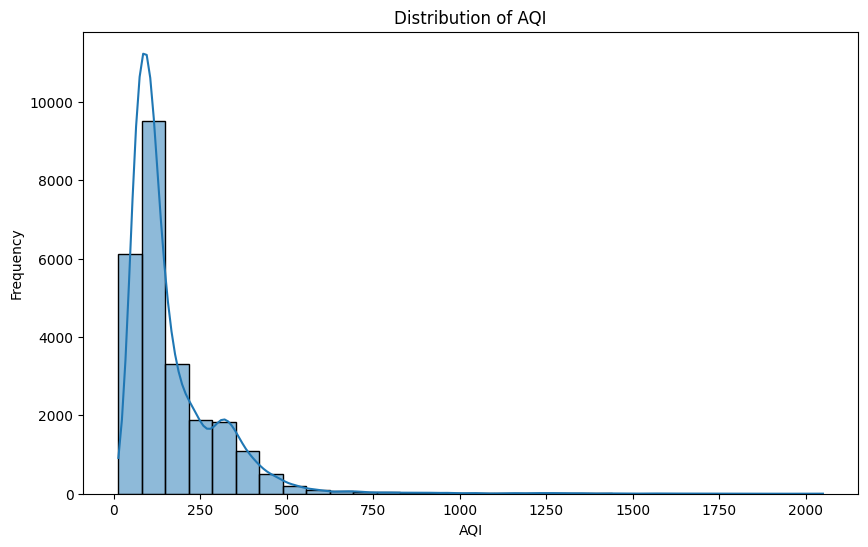

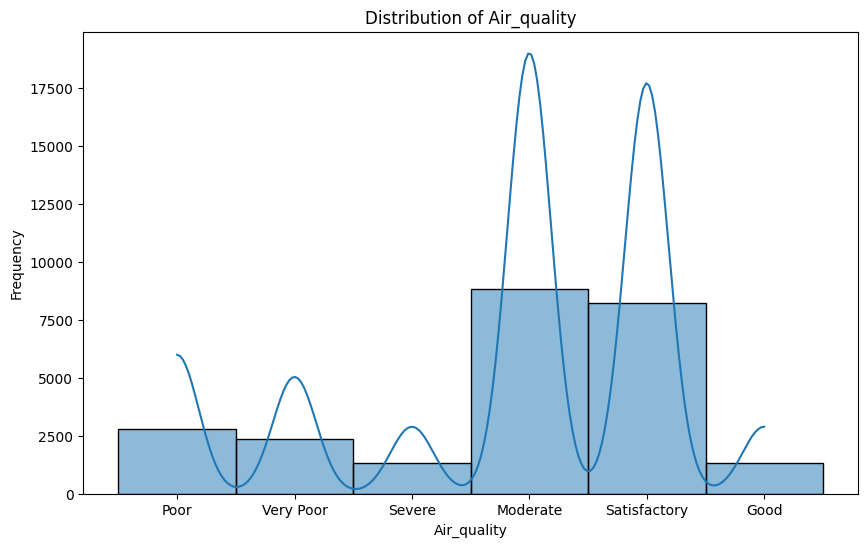

In [7]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cols = df.columns[2:]
for col in cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [8]:
df = df.drop(columns=['City','Date'])
target = df.loc[:,'Air_quality']

In [9]:
df['PM2']=df['PM2'].fillna((df['PM2'].median()))
df['PM10']=df['PM10'].fillna((df['PM10'].median()))
df['NO']=df['NO'].fillna((df['NO'].median()))
df['NO2']=df['NO2'].fillna((df['NO2'].median()))
df['NOx']=df['NOx'].fillna((df['NOx'].median()))
df['NH3']=df['NH3'].fillna((df['NH3'].median()))
df['CO']=df['CO'].fillna((df['CO'].median()))
df['SO2']=df['SO2'].fillna((df['SO2'].median()))
df['O3']=df['O3'].fillna((df['O3'].median()))
df['Benzene']=df['Benzene'].fillna((df['Benzene'].median()))
df['Toluene']=df['Toluene'].fillna((df['Toluene'].median()))
df['Xylene']=df['Xylene'].fillna((df['Xylene'].median()))
df['AQI']=df['AQI'].fillna((df['AQI'].median()))
df['Air_quality']=df['Air_quality'].fillna('Moderate')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PM2          29531 non-null  float64
 1   PM10         29531 non-null  float64
 2   NO           29531 non-null  float64
 3   NO2          29531 non-null  float64
 4   NOx          29531 non-null  float64
 5   NH3          29531 non-null  float64
 6   CO           29531 non-null  float64
 7   SO2          29531 non-null  float64
 8   O3           29531 non-null  float64
 9   Benzene      29531 non-null  float64
 10  Toluene      29531 non-null  float64
 11  Xylene       29531 non-null  float64
 12  AQI          29531 non-null  float64
 13  Air_quality  29531 non-null  object 
dtypes: float64(13), object(1)
memory usage: 3.2+ MB


In [11]:
unique_aqi_buckets = df['Air_quality'].unique()
print(unique_aqi_buckets)

['Moderate' 'Poor' 'Very Poor' 'Severe' 'Satisfactory' 'Good']


In [12]:
Air_quality = df['Air_quality'].value_counts()
print(Air_quality)

Moderate        13510
Satisfactory     8224
Poor             2781
Very Poor        2337
Good             1341
Severe           1338
Name: Air_quality, dtype: int64


In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(df.drop('Air_quality', axis=1), df['Air_quality'])
print(X_resampled.shape)
print(y_resampled.shape)
df_new = pd.concat([X_resampled, y_resampled], axis=1)
df_new.head()
df_new.info()

(81060, 13)
(81060,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81060 entries, 0 to 81059
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PM2          81060 non-null  float64
 1   PM10         81060 non-null  float64
 2   NO           81060 non-null  float64
 3   NO2          81060 non-null  float64
 4   NOx          81060 non-null  float64
 5   NH3          81060 non-null  float64
 6   CO           81060 non-null  float64
 7   SO2          81060 non-null  float64
 8   O3           81060 non-null  float64
 9   Benzene      81060 non-null  float64
 10  Toluene      81060 non-null  float64
 11  Xylene       81060 non-null  float64
 12  AQI          81060 non-null  float64
 13  Air_quality  81060 non-null  object 
dtypes: float64(13), object(1)
memory usage: 8.7+ MB


In [14]:
Air_quality = df_new['Air_quality'].value_counts()
print(Air_quality)

Moderate        13510
Poor            13510
Very Poor       13510
Severe          13510
Satisfactory    13510
Good            13510
Name: Air_quality, dtype: int64


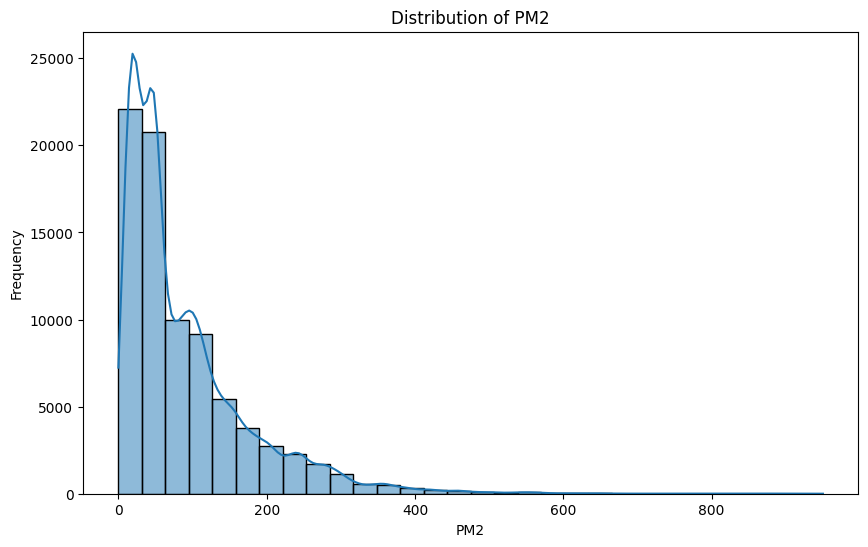

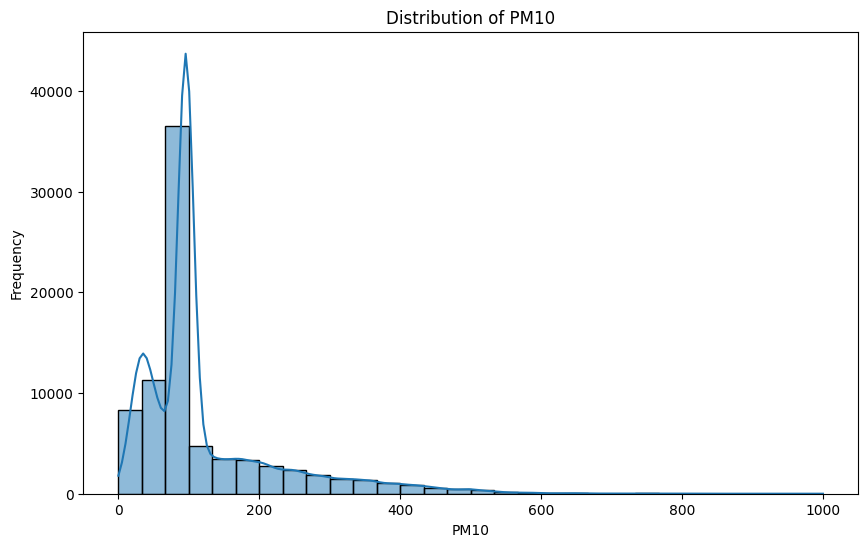

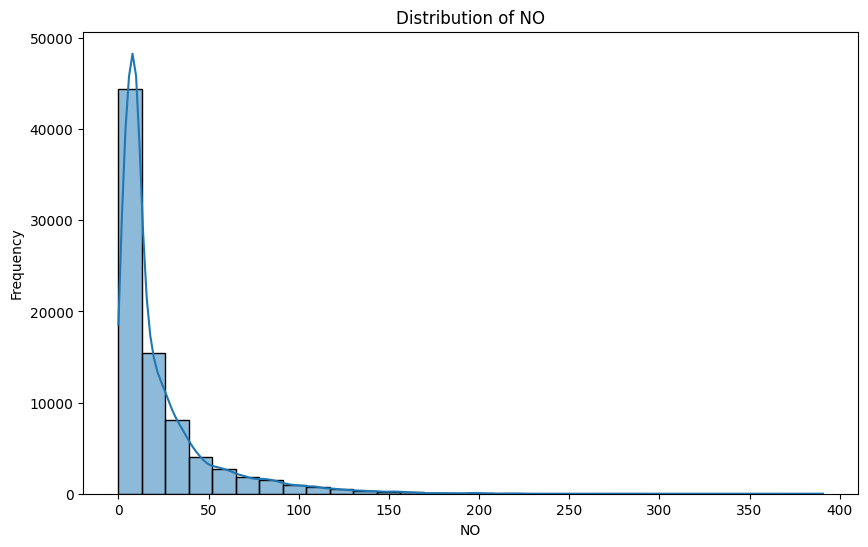

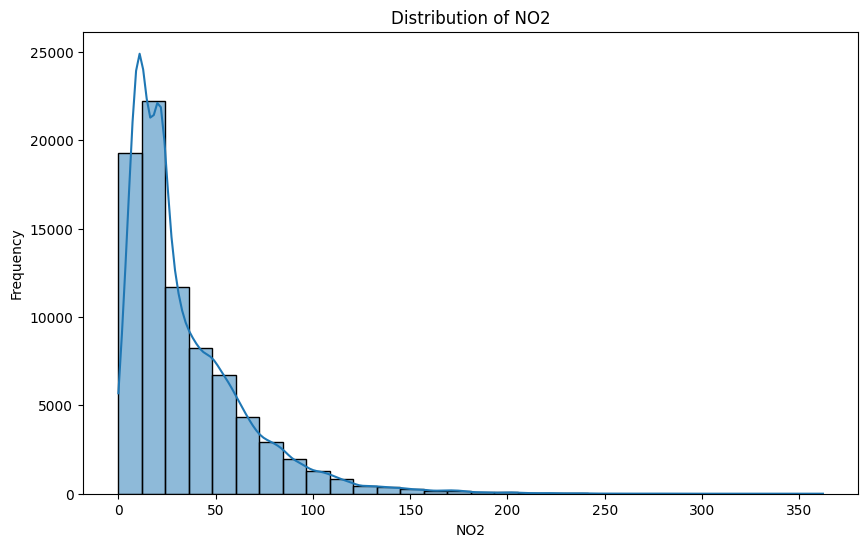

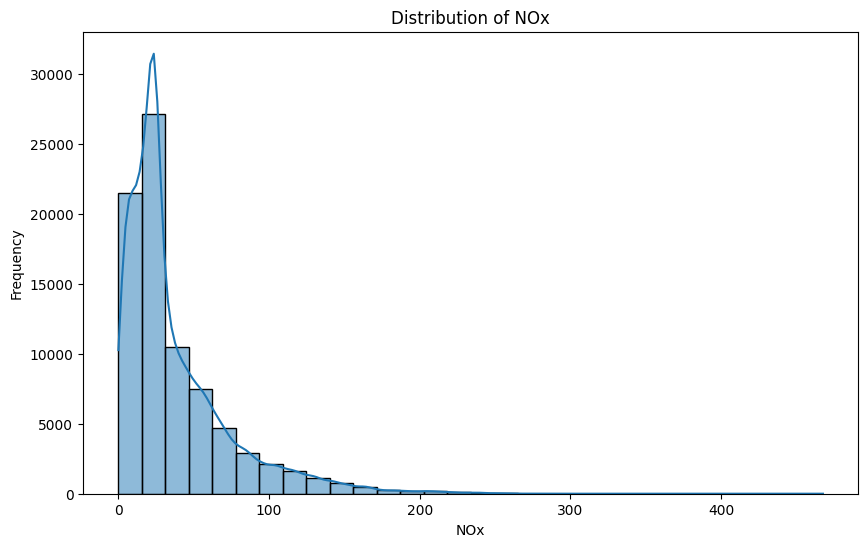

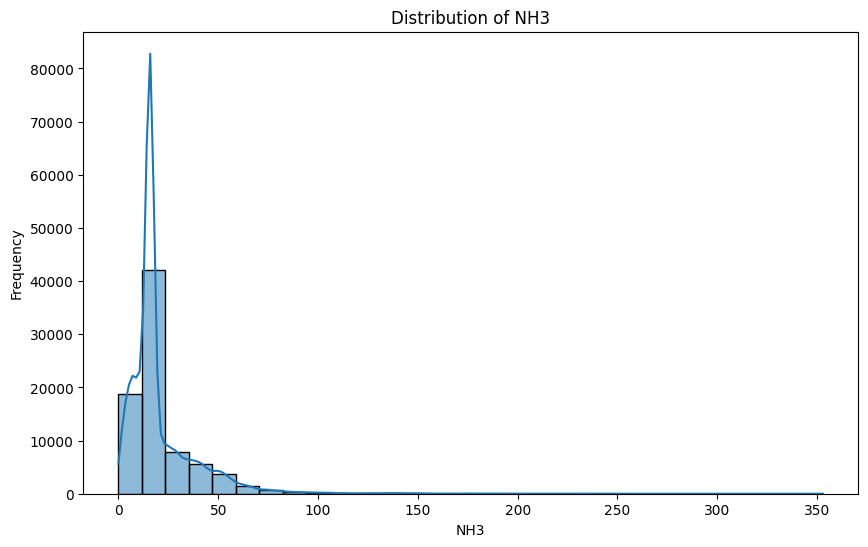

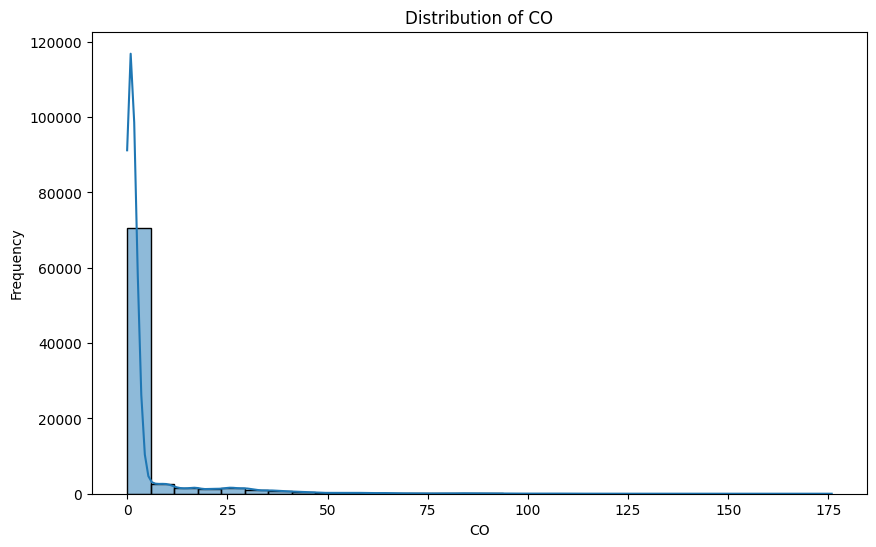

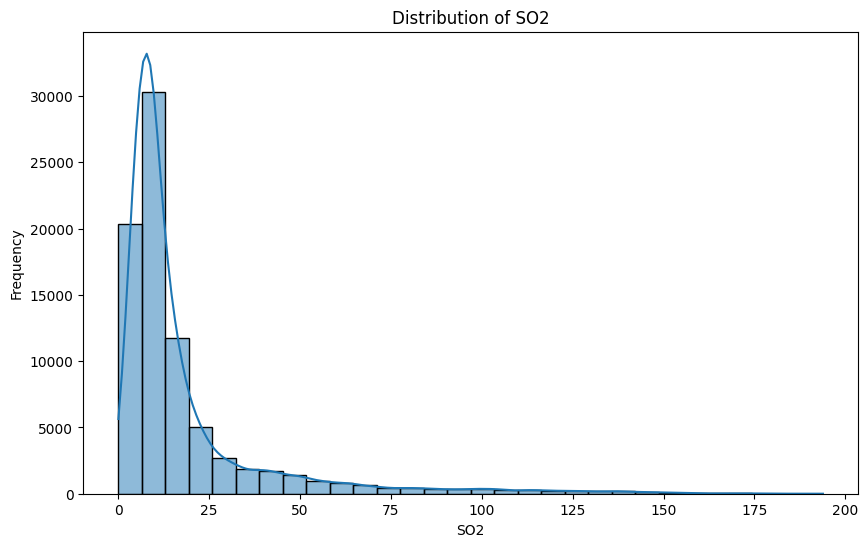

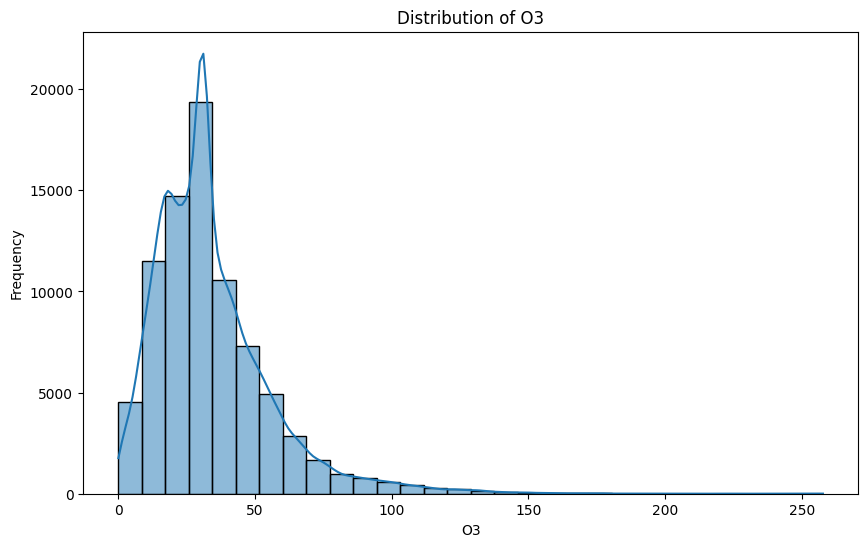

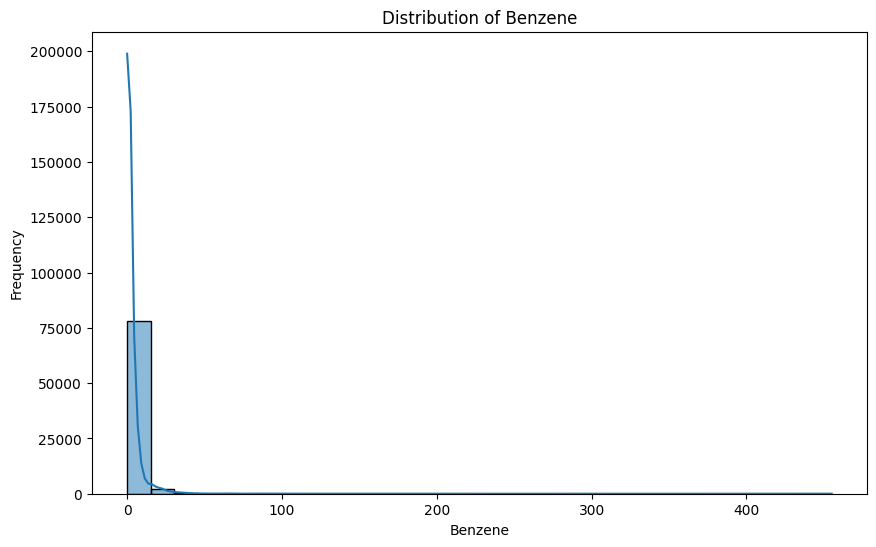

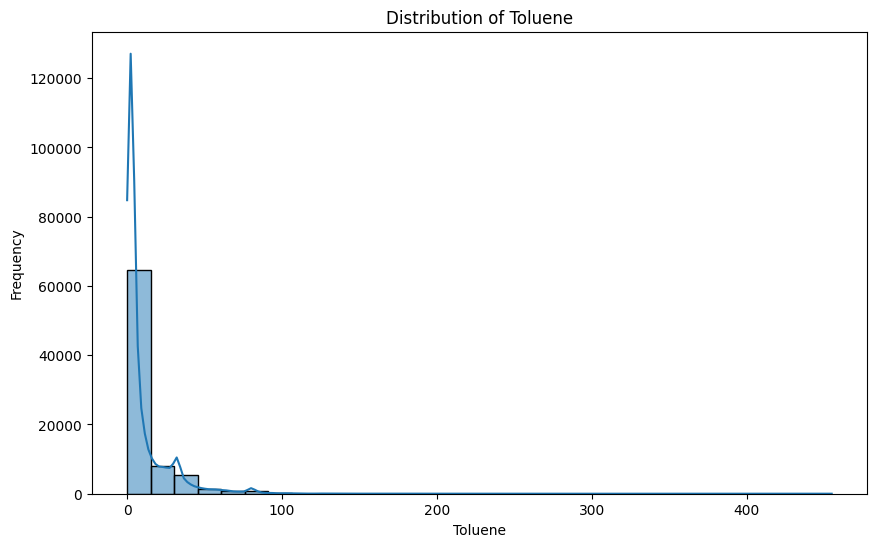

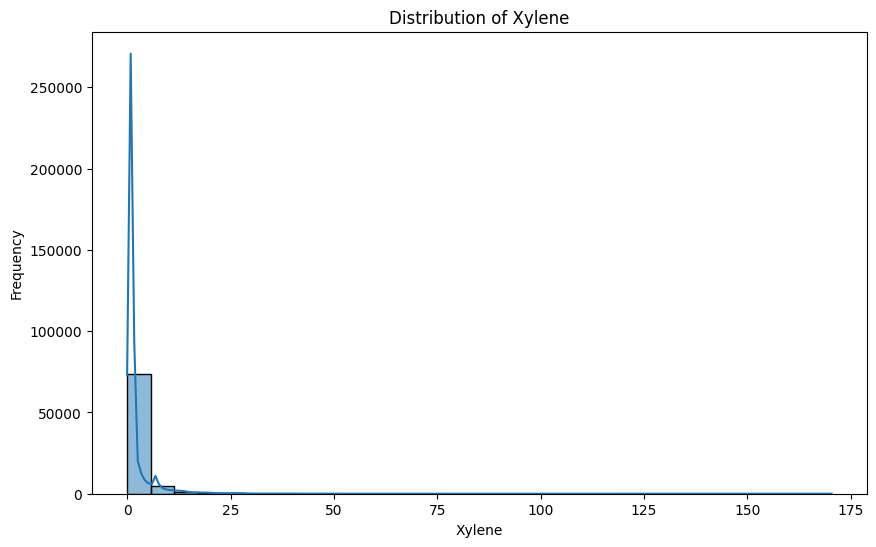

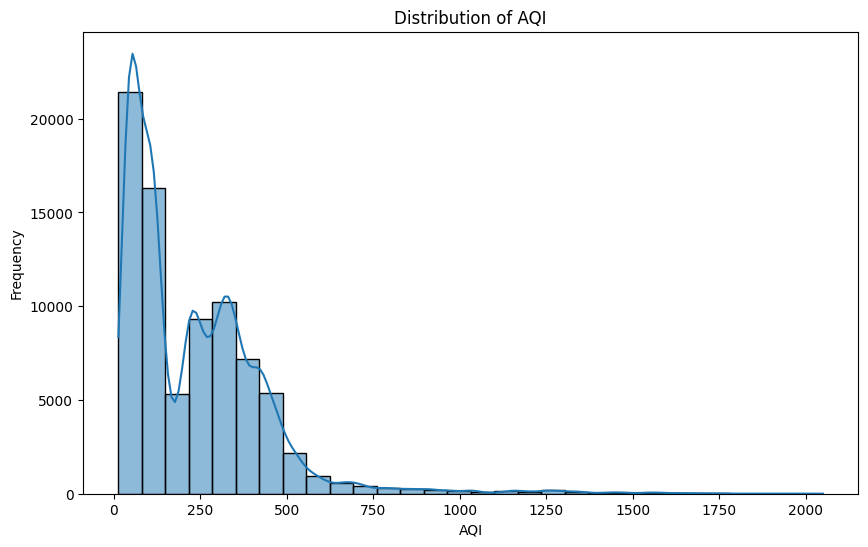

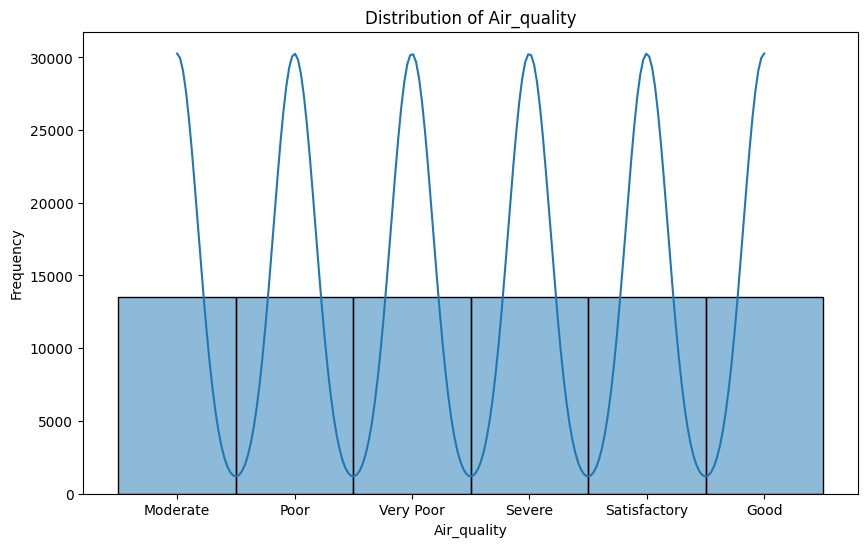

In [15]:
cols = df_new.columns[0:]
for col in cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_new[col], bins=30, kde=True)
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-16-52e1c75ad35c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(), annot=True, cmap='RdBu')


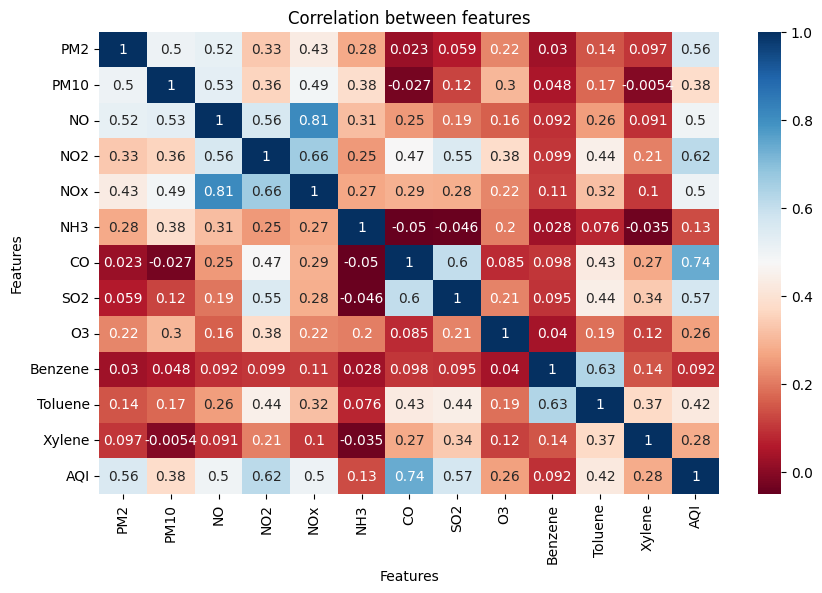

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_new.corr(), annot=True, cmap='RdBu')
plt.title('Correlation between features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=10)
selector.fit(df_new.drop('Air_quality', axis=1), df_new['Air_quality'])
selected_features = df_new.drop('Air_quality', axis=1).columns[selector.get_support()]
print(selected_features)

Index(['PM2', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Toluene', 'AQI'], dtype='object')


In [18]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_new[selected_features] = scaler.fit_transform(df_new[selected_features])
df_new.head()


,PM2,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,0.051087,0.095671,0.002304,0.050276,0.036674,15.85,0.005233,0.142533,0.517422,0.00,0.000044,0.00,0.051572,Moderate
1,0.051087,0.095671,0.002432,0.043291,0.035199,15.85,0.005517,0.126593,0.132120,3.68,0.012092,3.77,0.051572,Moderate
2,0.051087,0.095671,0.044489,0.053258,0.063512,15.85,0.098970,0.149910,0.119083,6.80,0.036056,2.25,0.051572,Moderate
3,0.051087,0.095671,0.004300,0.050994,0.038428,15.85,0.009670,0.095847,0.139958,4.43,0.022293,1.00,0.051572,Moderate
4,0.051087,0.095671,0.056520,0.059111,0.080748,15.85,0.125704,0.202837,0.152491,7.01,0.041530,2.78,0.051572,Moderate


In [19]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LinearSVC, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

spark = SparkSession.builder.appName("spark").getOrCreate()

data = spark.createDataFrame(df_new)

target_col = "Air_quality"
feature_cols = selected_features

indexer = StringIndexer(inputCol=target_col, outputCol="label")
data = indexer.fit(data).transform(data)

vector_assembler = VectorAssembler(inputCols=feature_cols.tolist(), outputCol="features")
data = vector_assembler.transform(data)

train_data, test_data = data.randomSplit([0.7, 0.3], seed=123)


In [20]:
train_count = train_data.count()

test_count = test_data.count()

print("Training set count:", train_count)
print("Testing set count:", test_count)

Training set count: 56756
Testing set count: 24304


In [21]:
test_data.groupBy("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0| 4108|
|  1.0| 4066|
|  4.0| 4011|
|  3.0| 4064|
|  2.0| 4082|
|  5.0| 3973|
+-----+-----+



In [22]:
from pyspark.mllib.evaluation import MulticlassMetrics
spark = SparkSession.builder.appName("SVMClassifier").getOrCreate()
# Create and train an SVM classifier using OneVsRest
svm = LinearSVC(maxIter=50, tol=1e-4, labelCol="label", featuresCol="features")
ovr_classifier = OneVsRest(classifier=svm,labelCol="label", featuresCol="features")


# Train the OneVsRest classifier
model = ovr_classifier.fit(train_data)

# Make predictions on the test data
predictions_svm = model.transform(test_data)

# Evaluate the model using a MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)
fm = evaluator.evaluate(predictions_svm)

# Print the accuracy of the model
print(f"Avg-F-measure: {fm}")

# Use MulticlassMetrics to compute per-class metrics
predictionAndLabels = predictions_svm.select("prediction", "label").rdd
metrics = MulticlassMetrics(predictionAndLabels)

print(f"Accuracy: {metrics.accuracy}")
# Print precision, recall, and F1 for each class
print("Per-class metrics:")
for label in sorted(set(predictions_svm.select("label").rdd.flatMap(lambda x: x).collect())):
    print(f"Class {label}:")
    print(f"Precision: {metrics.precision(label)}")
    print(f"Recall: {metrics.recall(label)}")
    print(f"F1-score: {metrics.fMeasure(label)}")
    print()

# Print the average metrics
print("Average metrics:")
print(f"Weighted precision: {metrics.weightedPrecision}")
print(f"Weighted recall: {metrics.weightedRecall}")
print(f"Weighted F1-score: {metrics.weightedFMeasure()}")

# Stop the Spark session
#spark.stop()

Avg-F-measure: 0.5470183841569249


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Accuracy: 0.5750905200789993
Per-class metrics:
Class 0.0:
Precision: 0.7007595831125243
Recall: 0.9656767283349562
F1-score: 0.8121609171870202

Class 1.0:
Precision: 0.43551688843398156
Recall: 0.20929660600098376
F1-score: 0.28272425249169436

Class 2.0:
Precision: 0.4862588652482269
Recall: 0.2687408133268006
F1-score: 0.34616598295992435

Class 3.0:
Precision: 0.6348174087043522
Recall: 0.312253937007874
F1-score: 0.4186046511627907

Class 4.0:
Precision: 0.9308424228359248
Recall: 1.0
F1-score: 0.9641826923076924

Class 5.0:
Precision: 0.3424
Recall: 0.7002265290712308
F1-score: 0.4599107290461233

Average metrics:
Weighted precision: 0.5887221375375026
Weighted recall: 0.5750905200789993
Weighted F1-score: 0.5470183841569249


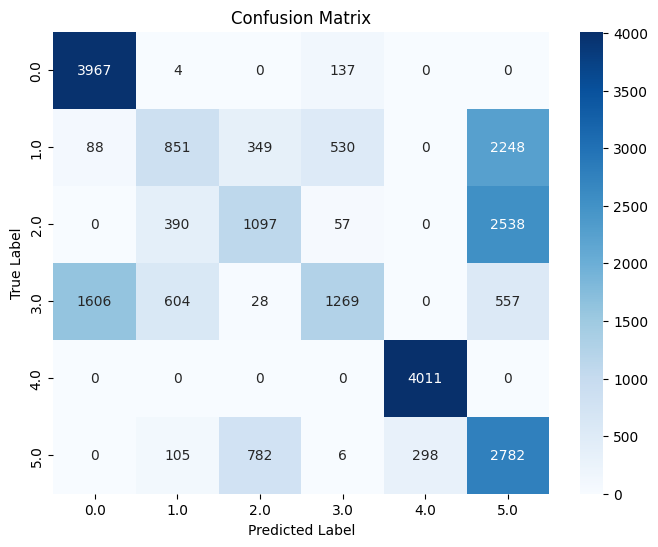

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import OneVsRest
from pyspark.sql import SparkSession


predictions_pd = predictions_svm.select("prediction", "label").toPandas()

conf_matrix = pd.crosstab(predictions_pd['label'], predictions_pd['prediction'], rownames=['Actual'], colnames=['Predicted'])


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(predictions_pd['label'])),
            yticklabels=sorted(set(predictions_pd['label'])))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [24]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DecissionTree").getOrCreate()

# Create a DecisionTree classifier
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

# Create a pipeline with the DecisionTree stage
pipeline = Pipeline(stages=[dt])

# Fit the pipeline to the training data
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model using a MulticlassClassificationEvaluator for F1
evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)
f1_score = evaluator_f1.evaluate(predictions)

# Print the F1-score of the model
print(f"Avg-F1 score: {f1_score}")

# Now, use the same MulticlassClassificationEvaluator for accuracy
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)
accuracy = evaluator_accuracy.evaluate(predictions)

# Print accuracy
print(f"Accuracy: {accuracy}")

# Use MulticlassMetrics to compute per-class metrics
predictionAndLabels = predictions.select("prediction", "label").rdd
metrics = MulticlassMetrics(predictionAndLabels)

# Print precision, recall, and F1 for each class
print("Per-class metrics:")
for label in sorted(set(predictions.select("label").rdd.flatMap(lambda x: x).collect())):
    print(f"Class {label}:")
    print(f"Precision: {metrics.precision(label)}")
    print(f"Recall: {metrics.recall(label)}")
    print(f"F1-score: {metrics.fMeasure(label)}")
    print()

# Print the average metrics
print("Average metrics:")
print(f"Weighted precision: {metrics.weightedPrecision}")
print(f"Weighted recall: {metrics.weightedRecall}")
print(f"Weighted F1-score: {metrics.weightedFMeasure()}")

# Stop the Spark session
# spark.stop()


Avg-F1 score: 0.9652225859688699
Accuracy: 0.9651497695852534


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Per-class metrics:
Class 0.0:
Precision: 1.0
Recall: 0.9542356377799416
F1-score: 0.9765819631290484

Class 1.0:
Precision: 1.0
Recall: 0.9212985735366453
F1-score: 0.959037378392217

Class 2.0:
Precision: 0.9770354906054279
Recall: 0.9171974522292994
F1-score: 0.9461713419257012

Class 3.0:
Precision: 0.9063336306868867
Recall: 1.0
F1-score: 0.9508656995788488

Class 4.0:
Precision: 1.0
Recall: 0.9997506856145599
F1-score: 0.9998753272659269

Class 5.0:
Precision: 0.9213821892393321
Recall: 1.0
F1-score: 0.9590826795413397

Average metrics:
Weighted precision: 0.9676287930221663
Weighted recall: 0.9651497695852534
Weighted F1-score: 0.9652225859688699


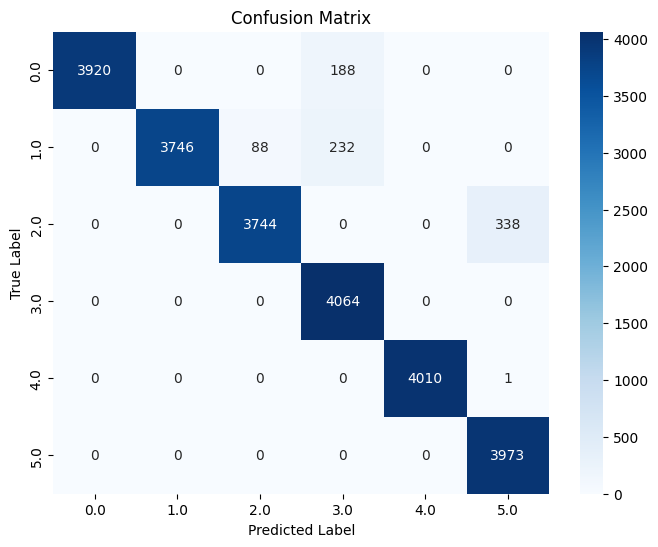

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

predictions_pd = predictions.select("prediction", "label").toPandas()

conf_matrix = pd.crosstab(predictions_pd['label'], predictions_pd['prediction'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(predictions_pd['label'])),
            yticklabels=sorted(set(predictions_pd['label'])))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [26]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("RandomForest").getOrCreate()

# Create a RandomForest classifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Create a pipeline with the RandomForest stage
pipeline_rf = Pipeline(stages=[rf])

# Fit the pipeline to the training data
model_rf = pipeline_rf.fit(train_data)

# Make predictions on the test data
predictions_rf = model_rf.transform(test_data)

# Evaluate the model using a MulticlassClassificationEvaluator for F1
evaluator_f1_rf = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)
f1_score_rf = evaluator_f1_rf.evaluate(predictions_rf)

# Print the F1-score of the model
print(f"Avg-F1 score for Random Forest: {f1_score_rf}")

# Now, use the same MulticlassClassificationEvaluator for accuracy
evaluator_accuracy_rf = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)
accuracy_rf = evaluator_accuracy_rf.evaluate(predictions_rf)

# Print accuracy
print(f"Accuracy for Random Forest: {accuracy_rf}")

# Use MulticlassMetrics to compute per-class metrics
predictionAndLabels_rf = predictions_rf.select("prediction", "label").rdd
metrics_rf = MulticlassMetrics(predictionAndLabels_rf)

# Print precision, recall, and F1 for each class
print("Per-class metrics for Random Forest:")
for label in sorted(set(predictions_rf.select("label").rdd.flatMap(lambda x: x).collect())):
    print(f"Class {label}:")
    print(f"Precision: {metrics_rf.precision(label)}")
    print(f"Recall: {metrics_rf.recall(label)}")
    print(f"F1-score: {metrics_rf.fMeasure(label)}")
    print()

# Print the average metrics
print("Average metrics for Random Forest:")
print(f"Weighted precision: {metrics_rf.weightedPrecision}")
print(f"Weighted recall: {metrics_rf.weightedRecall}")
print(f"Weighted F1-score: {metrics_rf.weightedFMeasure()}")

# Stop the Spark session
# spark.stop()

Avg-F1 score for Random Forest: 0.9675266877450515
Accuracy for Random Forest: 0.9673716260697828


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Per-class metrics for Random Forest:
Class 0.0:
Precision: 1.0
Recall: 0.9547224926971762
F1-score: 0.9768368617683686

Class 1.0:
Precision: 0.9992213859330392
Recall: 0.9468765371372356
F1-score: 0.9723449930546786

Class 2.0:
Precision: 0.9873183619550858
Recall: 0.9154826065654091
F1-score: 0.9500444896402696

Class 3.0:
Precision: 0.9198732458125849
Recall: 1.0
F1-score: 0.9582645602452252

Class 4.0:
Precision: 1.0
Recall: 0.9885315382697581
F1-score: 0.9942326980942828

Class 5.0:
Precision: 0.9110295803714744
Recall: 1.0
F1-score: 0.9534437245020397

Average metrics for Random Forest:
Weighted precision: 0.9697972803860521
Weighted recall: 0.9673716260697827
Weighted F1-score: 0.9675266877450515


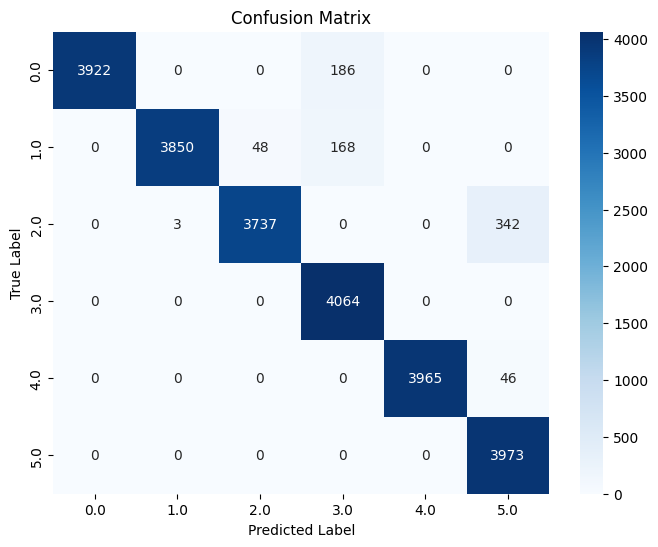

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

predictions_pd = predictions_rf.select("prediction", "label").toPandas()

conf_matrix = pd.crosstab(predictions_pd['label'], predictions_pd['prediction'], rownames=['Actual'], colnames=['Predicted'])


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(predictions_pd['label'])),
            yticklabels=sorted(set(predictions_pd['label'])))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [28]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql import SparkSession


spark = SparkSession.builder.appName("NaiveBayesExample").getOrCreate()


# Create a Naive Bayes classifier
nb = NaiveBayes(labelCol="label", featuresCol="features")

# Create a pipeline with the Naive Bayes stage
pipeline_nb = Pipeline(stages=[nb])

# Fit the pipeline to the training data
model_nb = pipeline_nb.fit(train_data)

# Make predictions on the test data
predictions_nb = model_nb.transform(test_data)

# Evaluate the model using a MulticlassClassificationEvaluator for F1
evaluator_f1_nb = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)
f1_score_nb = evaluator_f1_nb.evaluate(predictions_nb)

# Print the F1-score of the Naive Bayes model
print(f"Avg-F1 score for Naive Bayes: {f1_score_nb}")

# Now, use the same MulticlassClassificationEvaluator for accuracy
evaluator_accuracy_nb = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)
accuracy_nb = evaluator_accuracy_nb.evaluate(predictions_nb)

# Print accuracy
print(f"Accuracy for Naive Bayes: {accuracy_nb}")

# Use MulticlassMetrics to compute per-class metrics
predictionAndLabels_nb = predictions_nb.select("prediction", "label").rdd
metrics_nb = MulticlassMetrics(predictionAndLabels_nb)

# Print precision, recall, and F1 for each class
print("Per-class metrics for Naive Bayes:")
for label in sorted(set(predictions_nb.select("label").rdd.flatMap(lambda x: x).collect())):
    print(f"Class {label}:")
    print(f"Precision: {metrics_nb.precision(label)}")
    print(f"Recall: {metrics_nb.recall(label)}")
    print(f"F1-score: {metrics_nb.fMeasure(label)}")
    print()

# Print the average metrics
print("Average metrics for Naive Bayes:")
print(f"Weighted precision: {metrics_nb.weightedPrecision}")
print(f"Weighted recall: {metrics_nb.weightedRecall}")
print(f"Weighted F1-score: {metrics_nb.weightedFMeasure()}")

# Stop the Spark session
# spark.stop()


Avg-F1 score for Naive Bayes: 0.4290139050452355
Accuracy for Naive Bayes: 0.4420671494404213


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Per-class metrics for Naive Bayes:
Class 0.0:
Precision: 0.6137712702809656
Recall: 0.377555988315482
F1-score: 0.4675207234363225

Class 1.0:
Precision: 0.4596552585560829
Recall: 0.4525332021642892
F1-score: 0.45606642706655104

Class 2.0:
Precision: 0.4495560936238902
Recall: 0.13645271925526703
F1-score: 0.2093591430182297

Class 3.0:
Precision: 0.390224032586558
Recall: 0.4714566929133858
F1-score: 0.4270113661689324

Class 4.0:
Precision: 0.6062052505966588
Recall: 0.5066068312141611
F1-score: 0.5519489338584816

Class 5.0:
Precision: 0.3442523872839357
Recall: 0.7168386609614901
F1-score: 0.46513147150089834

Average metrics for Naive Bayes:
Weighted precision: 0.4777194328929397
Weighted recall: 0.44206714944042136
Weighted F1-score: 0.4290139050452355


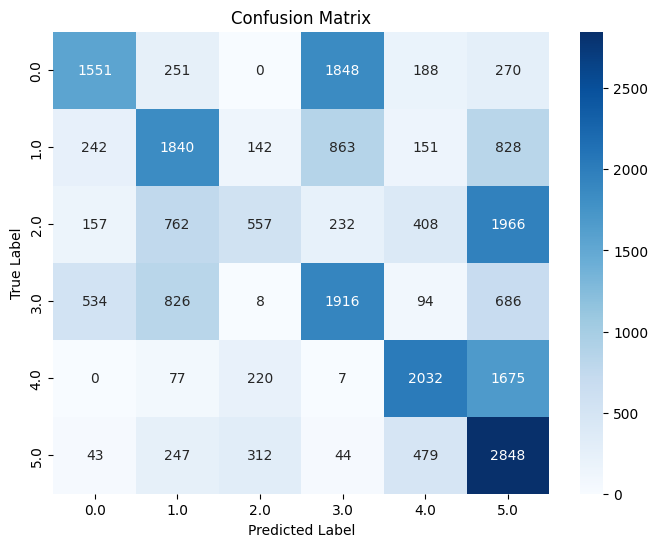

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

predictions_pd = predictions_nb .select("prediction", "label").toPandas()

conf_matrix = pd.crosstab(predictions_pd['label'], predictions_pd['prediction'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(predictions_pd['label'])),
            yticklabels=sorted(set(predictions_pd['label'])))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [30]:

from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression

# Create a LogisticRegression classifier
lr = LogisticRegression(labelCol="label", featuresCol="features")

# Create a pipeline with the LogisticRegression stage
pipeline_lr = Pipeline(stages=[lr])

# Fit the pipeline to the training data
model_lr = pipeline_lr.fit(train_data)

# Make predictions on the test data
predictions_lr = model_lr.transform(test_data)

# Evaluate the model using a MulticlassClassificationEvaluator for F1
evaluator_f1_lr = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)
f1_score_lr = evaluator_f1_lr.evaluate(predictions_lr)

# Print the F1-score of the LogisticRegression model
print(f"Avg-F1 score for Logistic Regression: {f1_score_lr}")

# Now, use the same MulticlassClassificationEvaluator for accuracy
evaluator_accuracy_lr = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)
accuracy_lr = evaluator_accuracy_lr.evaluate(predictions_lr)

# Print accuracy
print(f"Accuracy for Logistic Regression: {accuracy_lr}")

# Use MulticlassMetrics to compute per-class metrics
predictionAndLabels_lr = predictions_lr.select("prediction", "label").rdd
metrics_lr = MulticlassMetrics(predictionAndLabels_lr)

# Print precision, recall, and F1 for each class
print("Per-class metrics for Logistic Regression:")
for label in sorted(set(predictions_lr.select("label").rdd.flatMap(lambda x: x).collect())):
    print(f"Class {label}:")
    print(f"Precision: {metrics_lr.precision(label)}")
    print(f"Recall: {metrics_lr.recall(label)}")
    print(f"F1-score: {metrics_lr.fMeasure(label)}")
    print()

# Print the average metrics
print("Average metrics for Logistic Regression:")
print(f"Weighted precision: {metrics_lr.weightedPrecision}")
print(f"Weighted recall: {metrics_lr.weightedRecall}")
print(f"Weighted F1-score: {metrics_lr.weightedFMeasure()}")




Avg-F1 score for Logistic Regression: 0.9966649066611217
Accuracy for Logistic Regression: 0.996667215273206


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Per-class metrics for Logistic Regression:
Class 0.0:
Precision: 0.9941916747337851
Recall: 1.0
F1-score: 0.9970873786407767

Class 1.0:
Precision: 0.9950823702975166
Recall: 0.9953271028037384
F1-score: 0.9952047215049797

Class 2.0:
Precision: 0.9958414872798435
Recall: 0.9973052425281724
F1-score: 0.9965728274173807

Class 3.0:
Precision: 0.9980143956316704
Recall: 0.9894192913385826
F1-score: 0.9936982577536143

Class 4.0:
Precision: 1.0
Recall: 0.99950137122912
F1-score: 0.9997506234413965

Class 5.0:
Precision: 0.9969841668760995
Recall: 0.9984898061917946
F1-score: 0.9977364185110663

Average metrics for Logistic Regression:
Weighted precision: 0.9966720649834704
Weighted recall: 0.9966672152732061
Weighted F1-score: 0.9966649066611217


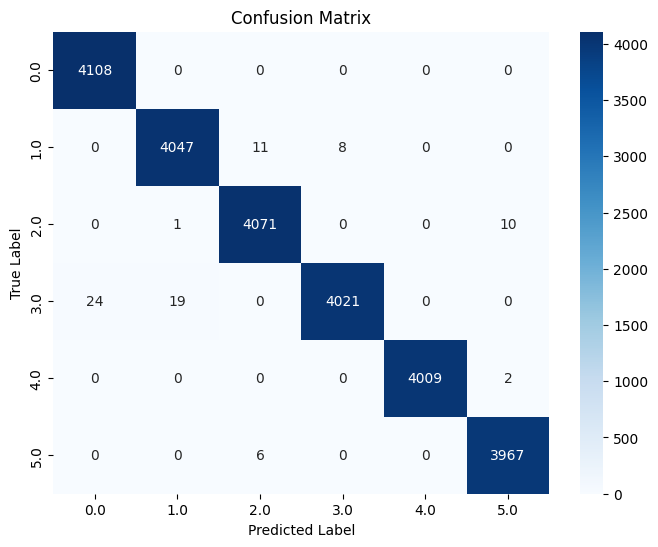

In [31]:
predictions_pd = predictions_lr.select("prediction", "label").toPandas()

conf_matrix = pd.crosstab(predictions_pd['label'], predictions_pd['prediction'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(predictions_pd['label'])),
            yticklabels=sorted(set(predictions_pd['label'])))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

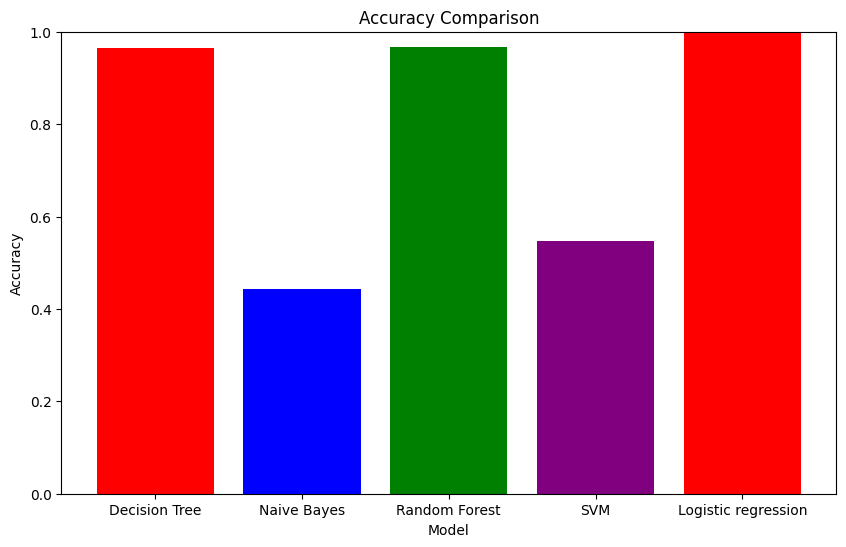

In [32]:
import matplotlib.pyplot as plt
import numpy as np

accuracy_values = []

# Decision Tree accuracy
accuracy_values.append(accuracy)

# Naive Bayes accuracy
accuracy_values.append(accuracy_nb)

# Random Forest accuracy
accuracy_values.append(accuracy_rf)

# SVM accuracy
accuracy_values.append(fm)

#Logistic regression
accuracy_values.append(accuracy_lr)


model_names = ['Decision Tree', 'Naive Bayes', 'Random Forest', 'SVM','Logistic regression']

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color=['red', 'blue', 'green', 'purple'])
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


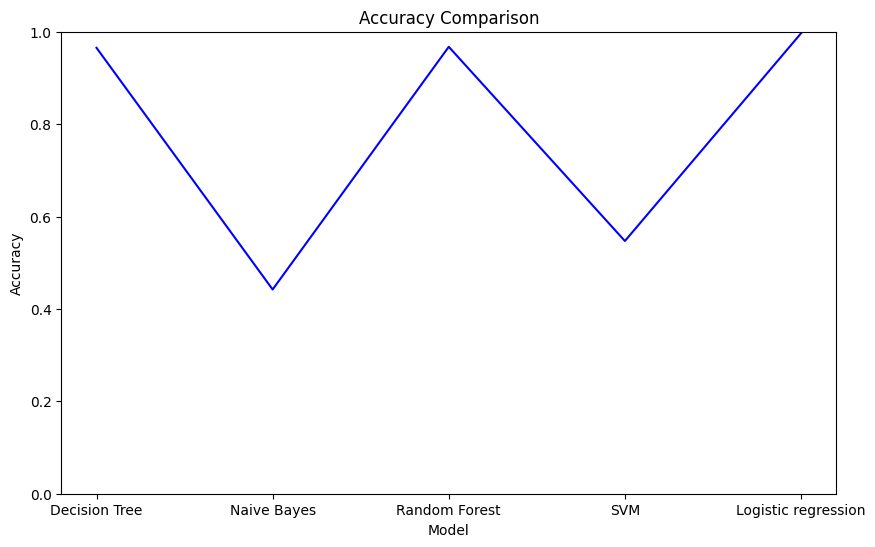

In [33]:
# prompt: plot accuracy for all in graphs from above  not bar graphs

# Create a list of model names and accuracy values
model_names = ['Decision Tree', 'Naive Bayes', 'Random Forest', 'SVM','Logistic regression']
accuracy_values = [accuracy, accuracy_nb, accuracy_rf, fm, accuracy_lr]

# Plot the accuracy values as a line graph
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_values, color='blue')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

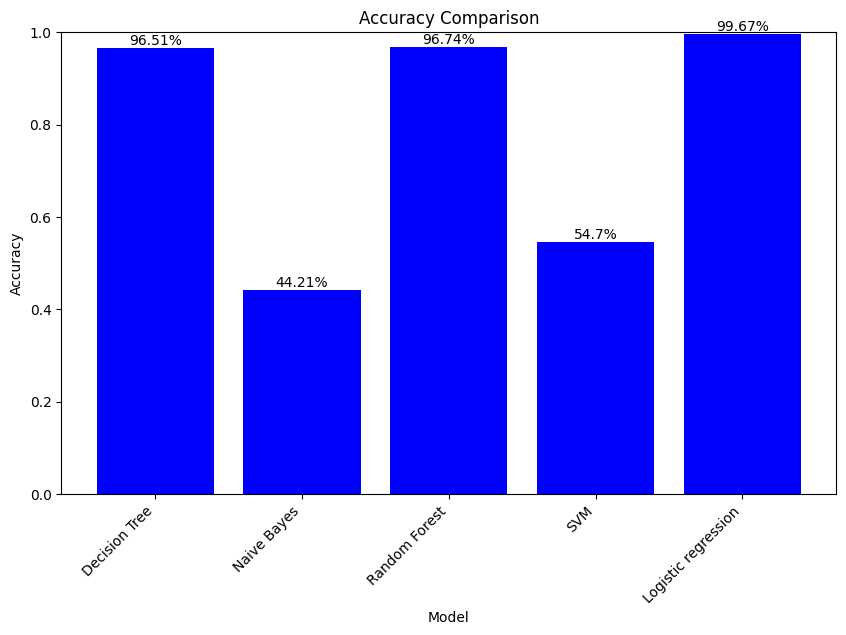

In [40]:
# prompt: write code to print the precentage accuracy in the plot for the above more accurate

import matplotlib.pyplot as plt
import numpy as np
# Create a list of model names and accuracy values
model_names = ['Decision Tree', 'Naive Bayes', 'Random Forest', 'SVM','Logistic regression']
accuracy_values = [accuracy, accuracy_nb, accuracy_rf, fm, accuracy_lr]
x_pos = np.arange(len(model_names))

# Plot the accuracy values as a line graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color='blue')
plt.xticks(x_pos, model_names, rotation=45, ha='right')
for i, val in enumerate(accuracy_values):
    plt.text(x_pos[i], val, str(round(val*100,2))+'%', ha='center', va='bottom')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


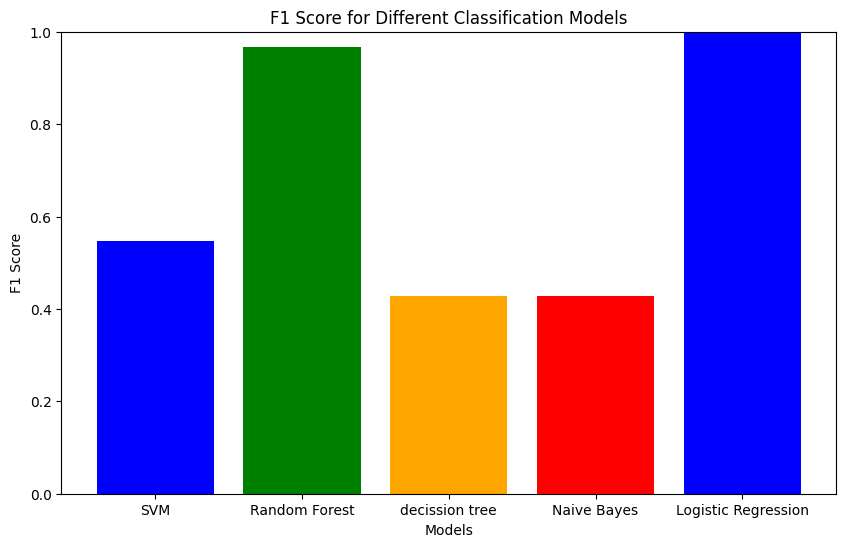

In [34]:
import matplotlib.pyplot as plt

f1_score_svm = evaluator_f1.evaluate(predictions_svm)
f1_score_rf = evaluator_f1_rf.evaluate(predictions_rf)
f1_score_dt = evaluator_f1_rf.evaluate(predictions_nb)
f1_score_nb = evaluator_f1_nb.evaluate(predictions_nb)
f1_score_lr = evaluator_f1_lr.evaluate(predictions_lr)

# F1 scores for each model
f1_scores = [f1_score_svm, f1_score_rf,f1_score_dt, f1_score_nb, f1_score_lr]

# Model names
model_names = ['SVM', 'Random Forest','decission tree','Naive Bayes', 'Logistic Regression']

plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Classification Models')
plt.ylim(0, 1)
plt.show()


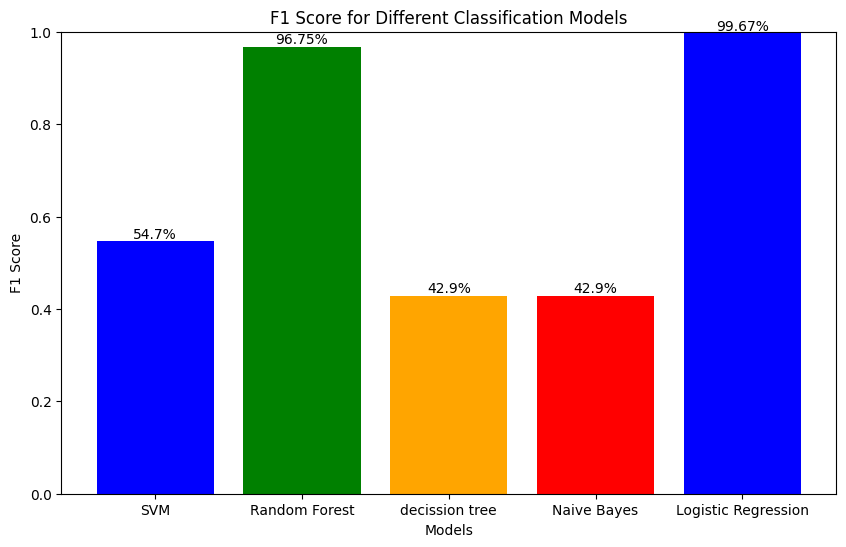

In [41]:
# prompt: write code to print the precentage f1 score in the plot for the above more accurate use different colours

import matplotlib.pyplot as plt
f1_score_svm = evaluator_f1.evaluate(predictions_svm)
f1_score_rf = evaluator_f1_rf.evaluate(predictions_rf)
f1_score_dt = evaluator_f1_rf.evaluate(predictions_nb)
f1_score_nb = evaluator_f1_nb.evaluate(predictions_nb)
f1_score_lr = evaluator_f1_lr.evaluate(predictions_lr)

# F1 scores for each model
f1_scores = [f1_score_svm, f1_score_rf,f1_score_dt, f1_score_nb, f1_score_lr]

# Model names
model_names = ['SVM', 'Random Forest','decission tree','Naive Bayes', 'Logistic Regression']

plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Classification Models')
plt.ylim(0, 1)
for i, val in enumerate(f1_scores):
    plt.text(i, val, str(round(val*100,2))+'%', ha='center', va='bottom')
plt.show()
